In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [139]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import trange, tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [4]:
import sys
sys.path.append('../')

In [126]:
from Functions import show_img
from Pytorch_Functions import get_stats, save_models, load_models
import SimpleCNN

# Get Data

In [19]:
# from tempfile import TemporaryDirectory
# path = TemporaryDirectory(prefix='STL10')
# path.name

In [20]:
path = 'STL10'

In [21]:
from torchvision import datasets, transforms
train_data = datasets.STL10(root=path, split='train', download=True, transform=transforms.ToTensor())
train_data

Files already downloaded and verified


Dataset STL10
    Number of datapoints: 5000
    Root location: STL10
    Split: train
    StandardTransform
Transform: ToTensor()

In [22]:
val_data = datasets.STL10(root=path, split='test', download=True, transform=transforms.ToTensor())
val_data

Files already downloaded and verified


Dataset STL10
    Number of datapoints: 8000
    Root location: STL10
    Split: test
    StandardTransform
Transform: ToTensor()

In [23]:
batch_size = 8
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=12)
val_dataloader = DataLoader(val_data, batch_size=2*batch_size, shuffle=False, num_workers=12)

In [74]:
test = SimpleCNN.SimpleCNN(epochs=3)

In [75]:
test.fit(train_dataloader, val_dataloader)

training loss: 2.0575	validation loss: 2.1078	validation accuracy: 0.18


training loss: 1.9202	validation loss: 1.9321	validation accuracy: 0.27


training loss: 1.8066	validation loss: 1.6999	validation accuracy: 0.36



In [137]:
import itertools
scales = [1e-3, 1e-4, 1e-5]
weight_decay_scale = [SimpleCNN.SimpleCNN(epochs=8, learning_rate=lr, weight_decay=wd) for lr, wd in itertools.combinations_with_replacement(scales, 2)]
for model in weight_decay_scale:
    print(f"learning rate = {model.learning_rate}, weight decay = {model.weight_decay}")

learning rate = 0.001, weight decay = 0.001
learning rate = 0.001, weight decay = 0.0001
learning rate = 0.001, weight decay = 1e-05
learning rate = 0.0001, weight decay = 0.0001
learning rate = 0.0001, weight decay = 1e-05
learning rate = 1e-05, weight decay = 1e-05


In [138]:
for model in weight_decay_scale:
    model.fit(train_dataloader, val_dataloader)

training loss: 2.3027	validation loss: 2.3013	validation accuracy: 0.10


training loss: 2.2991	validation loss: 2.2958	validation accuracy: 0.19


training loss: 2.2888	validation loss: 2.2791	validation accuracy: 0.15


training loss: 2.2634	validation loss: 2.2430	validation accuracy: 0.19


training loss: 2.2133	validation loss: 2.1760	validation accuracy: 0.22


training loss: 2.1408	validation loss: 2.1039	validation accuracy: 0.24


training loss: 2.0841	validation loss: 2.0638	validation accuracy: 0.26


training loss: 2.0526	validation loss: 2.0375	validation accuracy: 0.26



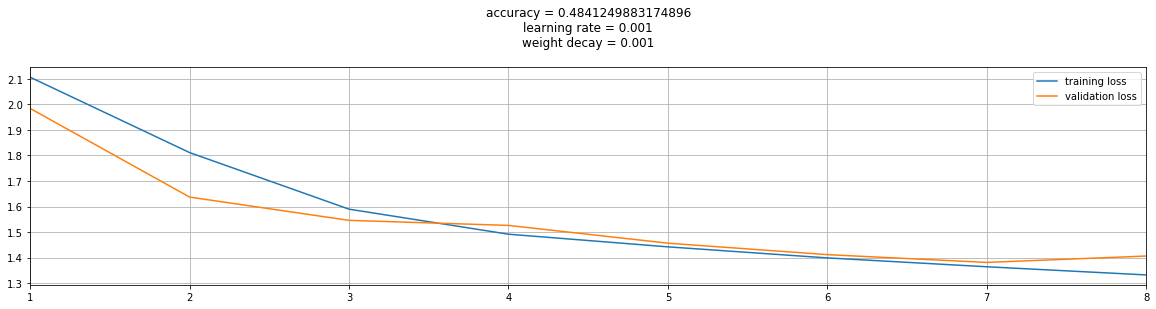

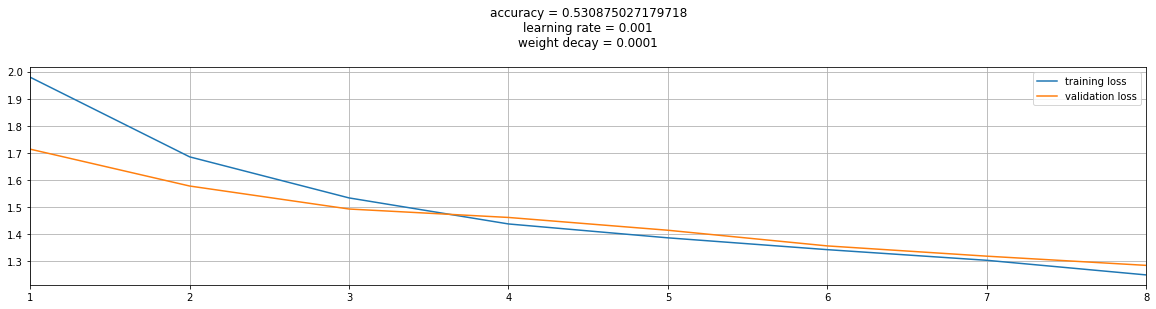

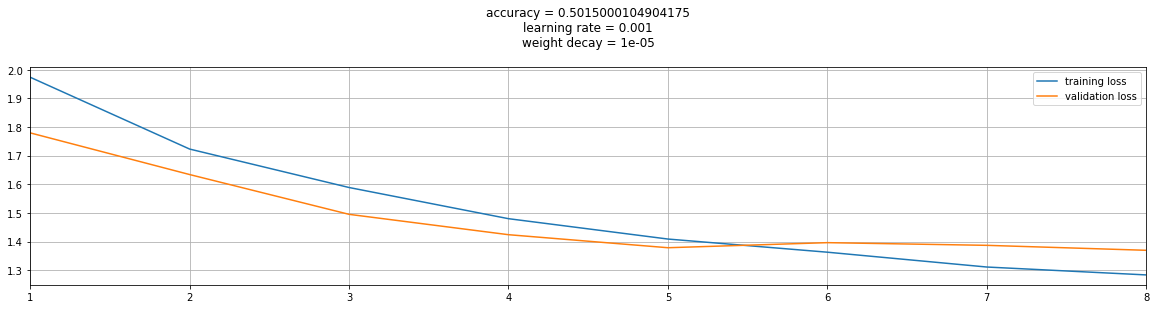

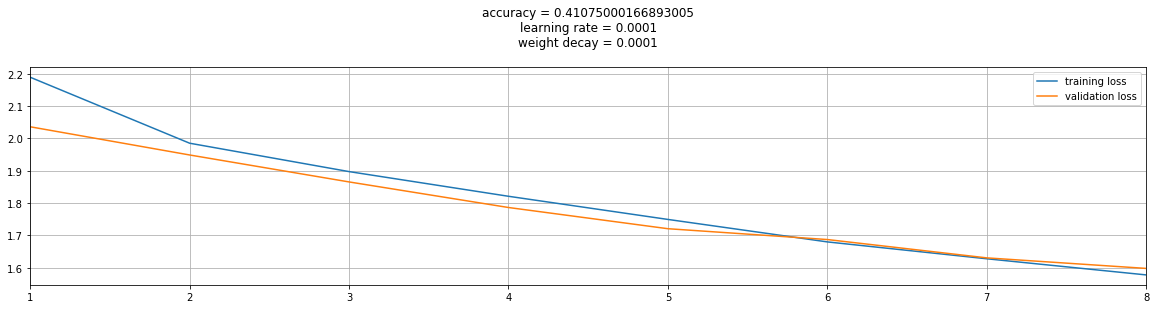

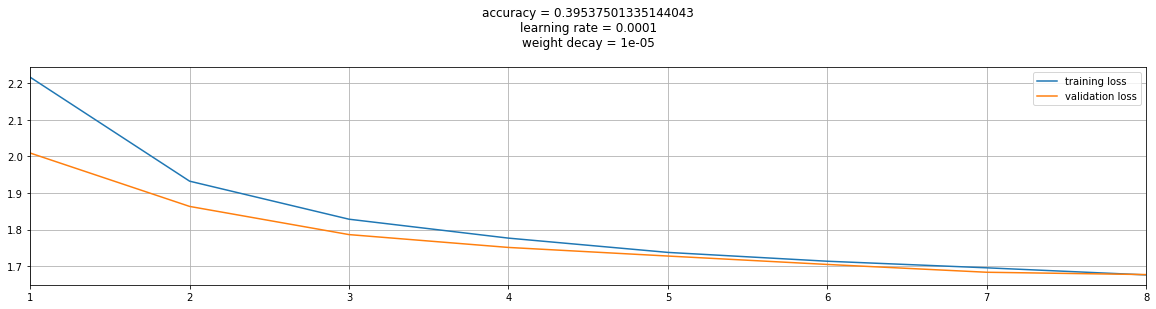

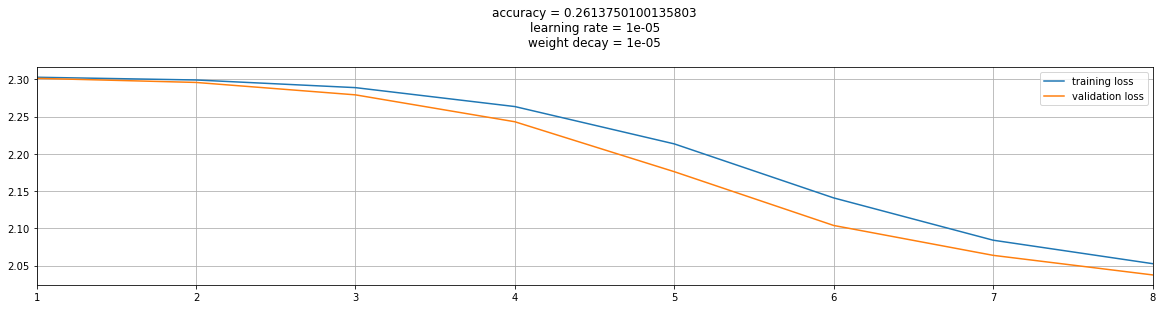

In [140]:
for model in weight_decay_scale:
    model.plot_loss_history(lr=True, wd=True)